In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
%matplotlib inline
df = pd.read_csv('insurance.csv')


In [9]:
#gathering info on the dataset
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 1338 rows and 7 columns


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
#looking for duplicate and null data
print(f"Duplicated data in column: {df.duplicated().sum()}")
df[df.duplicated()]

Duplicated data in column: 1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [20]:
print(f"Before deleting the duplicate data the dataset has {df.shape[0]} rows and {df.shape[1]} columns")
df.drop_duplicates(inplace=True)
print(f"Now the dataset has {df.shape[0]} rows and {df.shape[1]} columns")


Before deleting the duplicate data the dataset has 1338 rows and 7 columns
Now the dataset has 1337 rows and 7 columns


In [22]:
print(f"There are {df.isnull().any().sum()} columns in dataset with missing values")

There are 0 columns in dataset with missing values


In [23]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

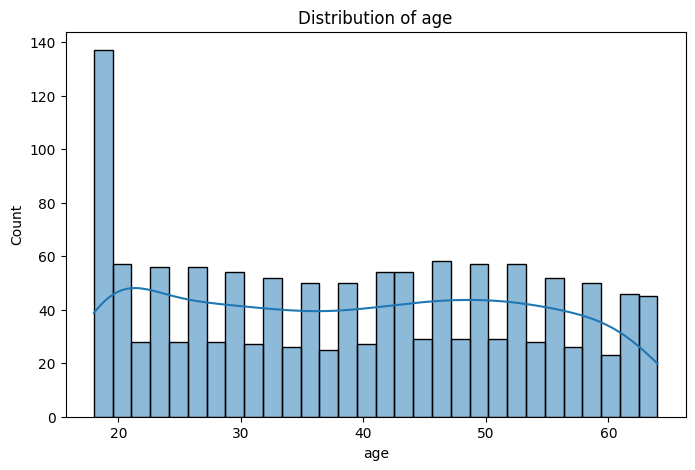

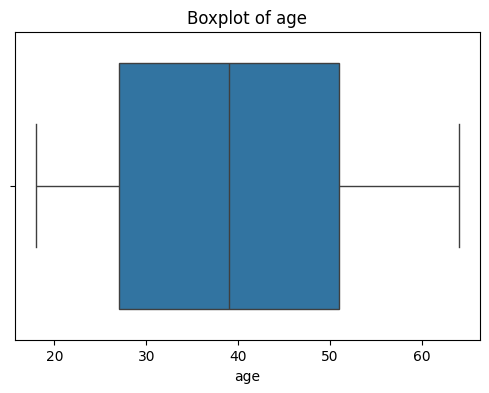

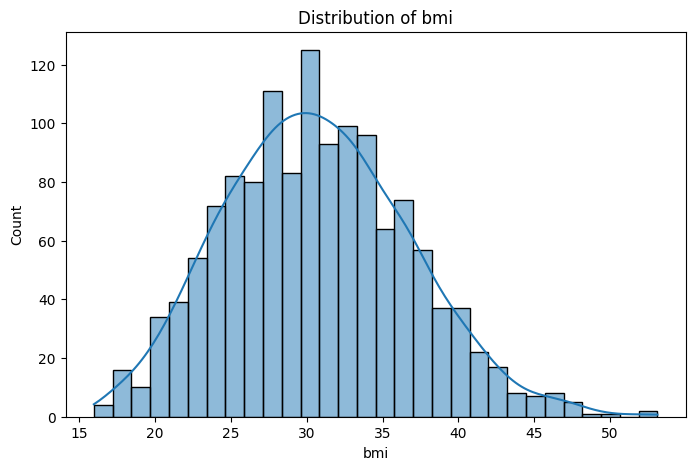

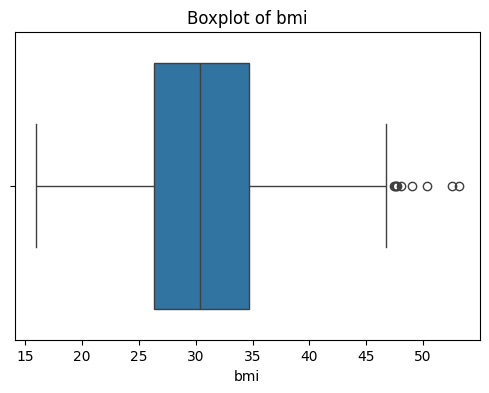

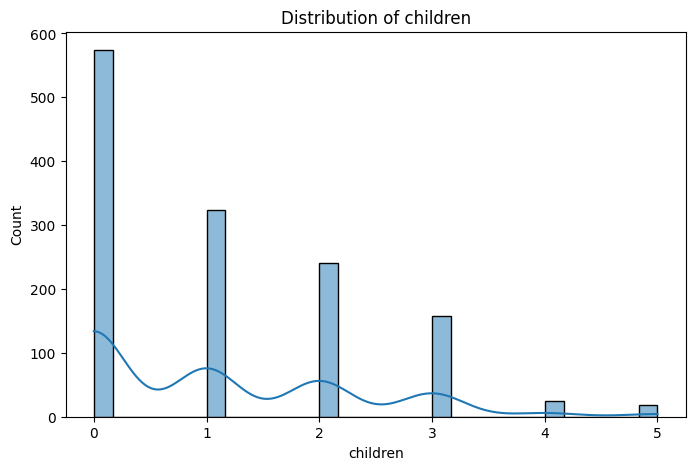

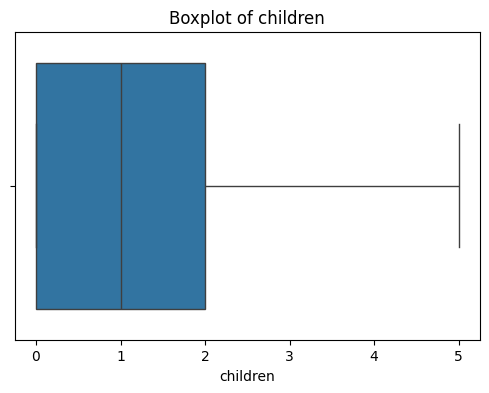

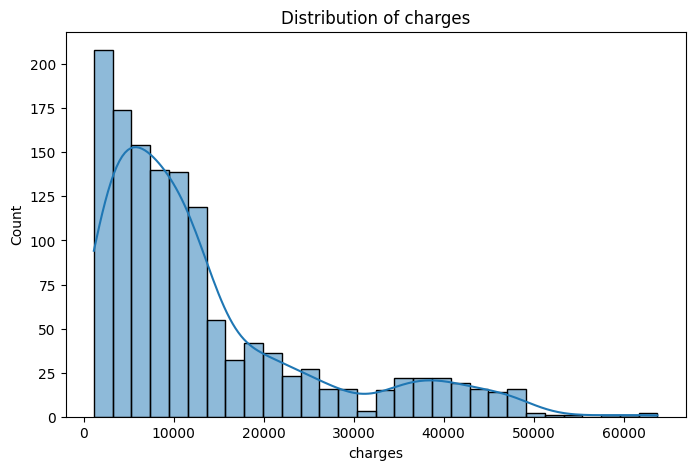

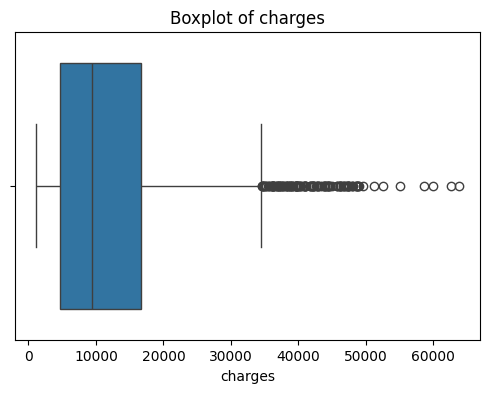

In [6]:
num_cols = ['age', 'bmi','children','charges']

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [8]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 =  col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
lbmi,ubmi = remove_outliers(df['bmi'])
df['bmi'] = np.where(df['bmi']>ubmi,ubmi,df['bmi'])
df['bmi'] = np.where(df['bmi']<lbmi,lbmi,df['bmi'])

lchareges,ucharges = remove_outliers(df['charges'])
df['charges'] = np.where(df['charges']>ucharges,ucharges,df['charges'])
df['charges'] = np.where(df['charges']<lchareges,lchareges,df['charges'])

In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.650034,1.094918,12479.369251
std,14.049960,6.056926,1.205493,10158.056096
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,47.290000,5.000000,34489.350562


In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

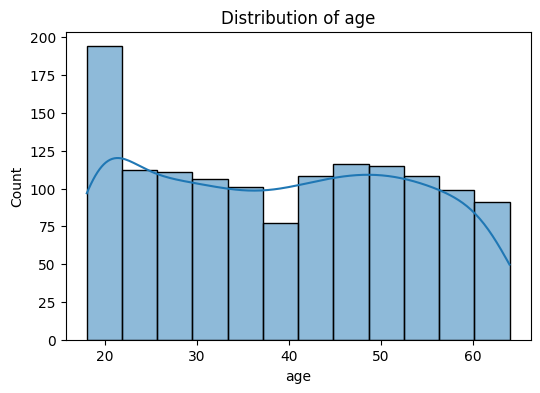

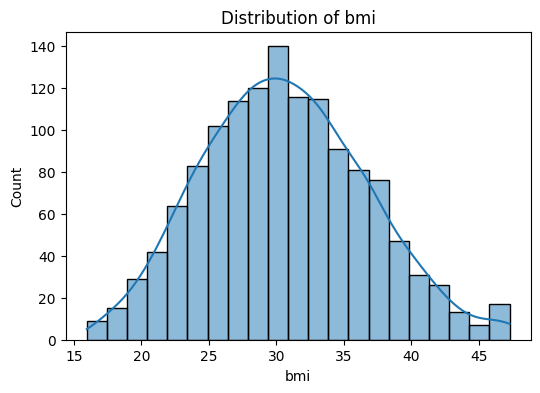

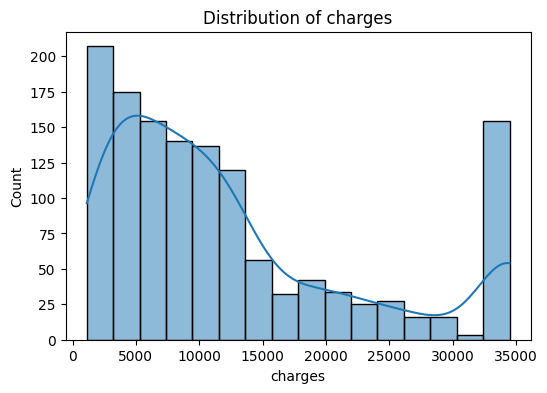

In [17]:
numeric_cols = ['age', 'bmi', 'charges']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)  # kde=True adds a smooth curve
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

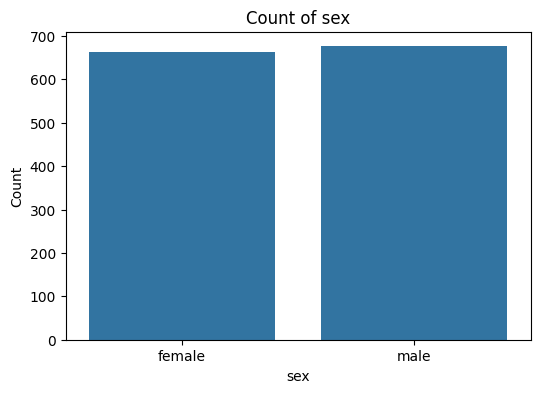

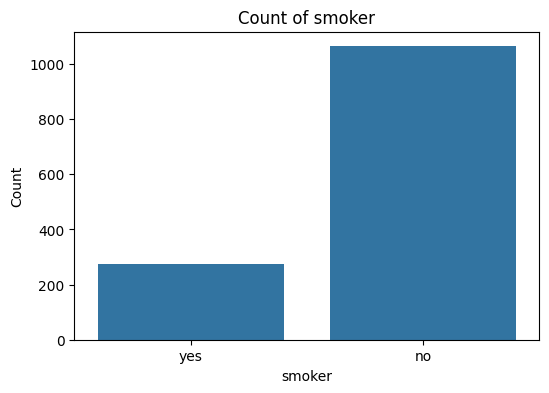

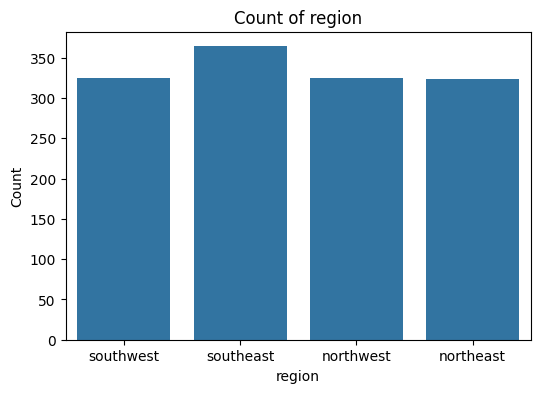

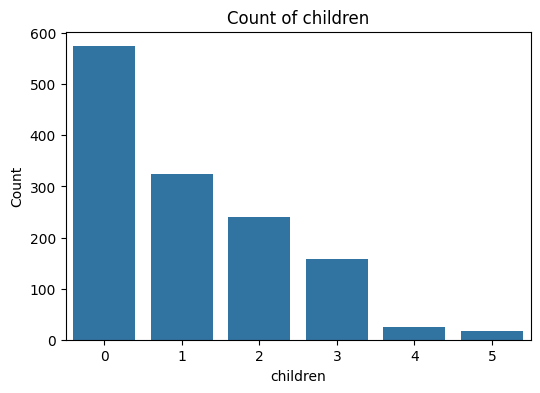

In [18]:
categorical_cols = ['sex', 'smoker', 'region', 'children']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


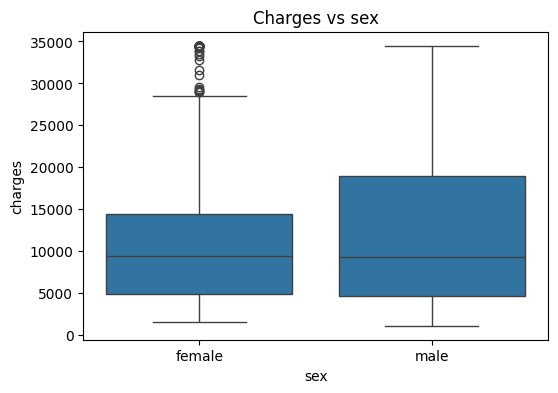

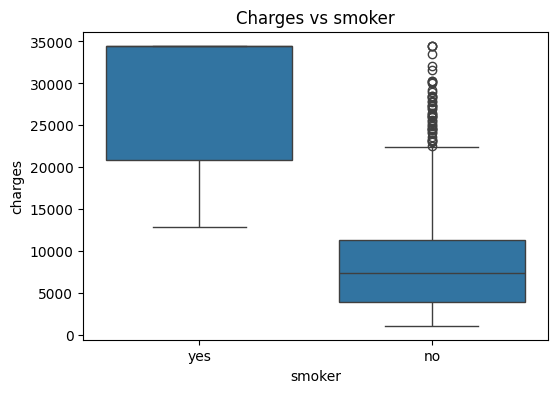

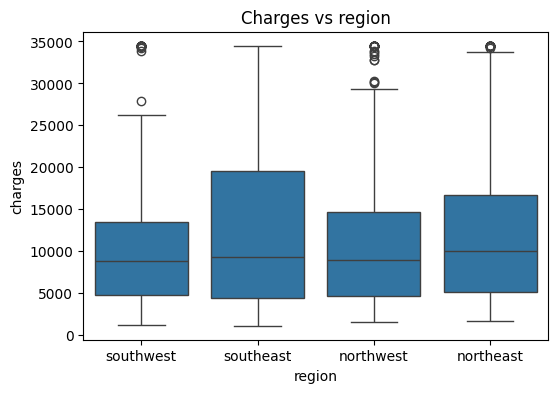

In [19]:
for col in ['sex', 'smoker', 'region']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f"Charges vs {col}")
    plt.show()


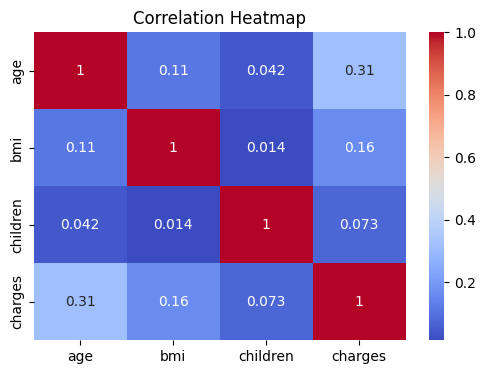

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
